In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Loading
# filename = "poseidon1.csv"
# data = pd.read_csv(filename, delimiter=",")
data =  pd.read_csv(r"E:\poseidon1.csv")
data [data==-999.2500]= np.nan
data = data.dropna()
data = data[['DEPT','ECGR','ATRX','ATRT','NPHI','CAL1','HDAR', 'HROM', 'DTSM', 'DTCO']]
data

,DEPT,ECGR,ATRX,ATRT,NPHI,CAL1,HDAR,HROM,DTSM,DTCO
7955,4557.0,34.4986,2.4200,2.3100,21.23,5.1223,6.2464,2.3115,131.5066,74.0847
7956,4557.5,35.7732,2.3201,2.2102,22.68,5.1216,6.2423,2.2707,139.8558,73.9341
7957,4558.0,38.3568,2.2992,2.1504,21.17,5.1223,6.2490,2.1994,141.8643,77.8736
7958,4558.5,40.4549,2.5562,2.4235,20.78,5.1216,6.2548,2.2740,140.0904,79.0222
7976,4567.5,35.4123,2.4119,2.3211,19.24,5.1223,6.2941,2.2208,127.5091,56.5047
...,...,...,...,...,...,...,...,...,...,...
8785,4972.0,33.3808,0.3973,1.5806,3.60,5.8381,6.0883,2.5987,109.9335,72.6598
8786,4972.5,26.2362,0.2871,1.8128,3.28,5.8389,6.0923,2.5005,106.3846,70.3970
8787,4973.0,24.0062,0.6886,3.6100,2.38,5.8358,6.0905,2.4206,104.1512,68.4944
8788,4973.5,29.7802,3.7580,4.1860,2.71,5.8377,6.0900,2.4205,105.6322,72.3066


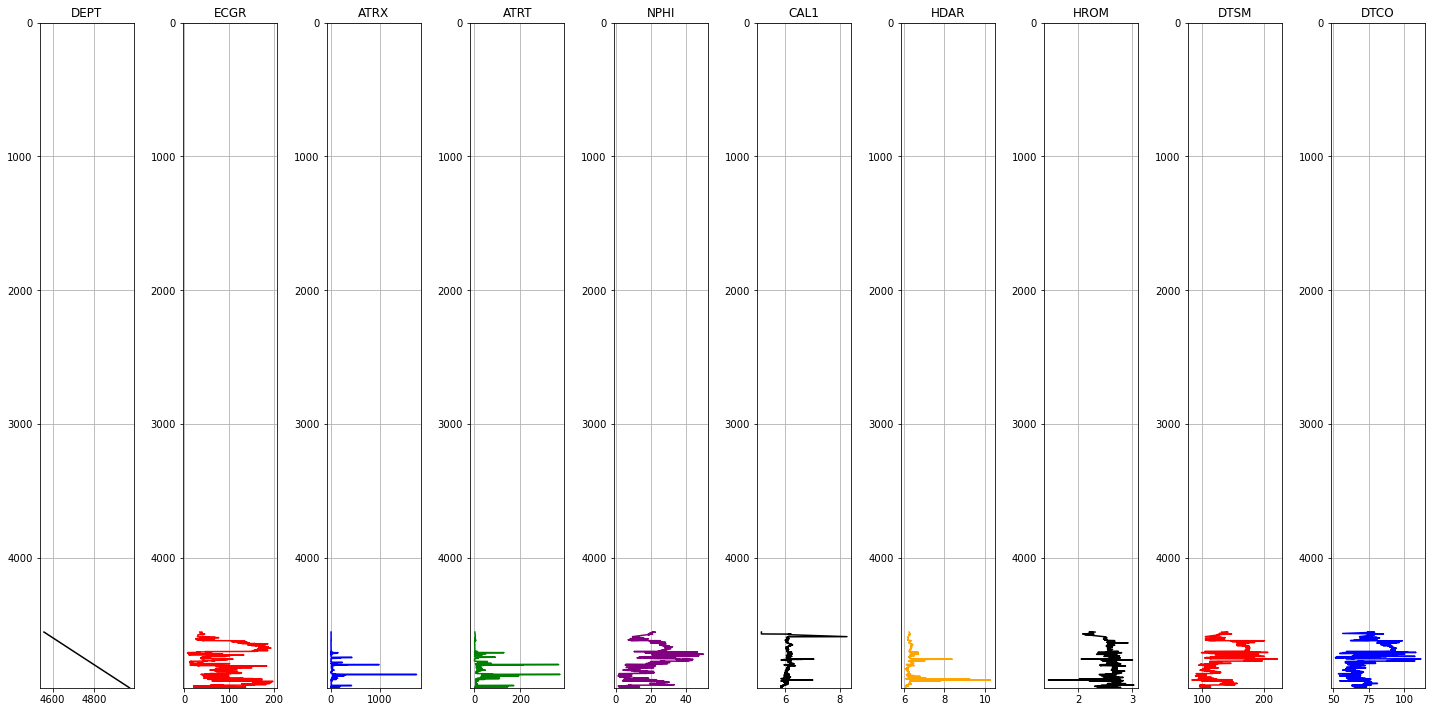

In [3]:
logs = ['DEPT','ECGR','ATRX','ATRT','NPHI','CAL1','HDAR', 'HROM', 'DTSM', 'DTCO']

fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'black', 'red', 'blue', 'green']

for i in range(len(logs)):
    if i == 10:
        ax[i].semilogx(data[logs[i]], data['DEPT'], color=colors[i])
    else:
    # for non-resistivity, normal plot
        ax[i].plot(data[logs[i]], data['DEPT'], color=colors[i])
    
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(data['DEPT']), 0)
plt.tight_layout(1.1)
plt.show()

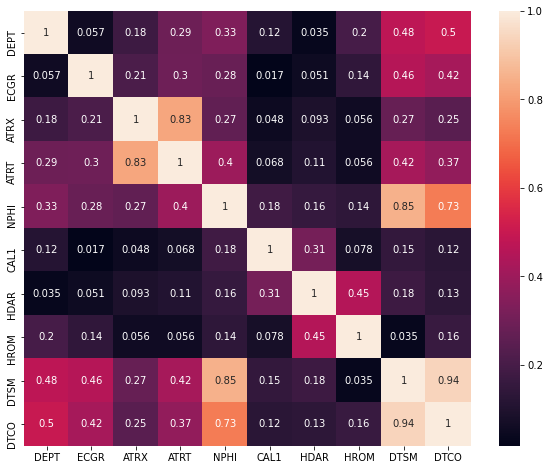

In [4]:
#Plot Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(abs(data.corr()), annot=True)
#Urutan Korelasi Terbaik
# DEPT    .M                             :   Along hole depth
#  ECGR    .gAPI                          :   EDTC Corrected Gamma-Ray
#  ATRX    .ohm.m                         :   Array Induction Two Foot Rxo
#  ATRT    .ohm.m                         :   Array Induction Two Foot Rt
#  NPHI    .pu                            :   Thermal Neutron Porosity (Ratio Method)
#  CAL1    .in                            :   Caliper 1
#  HDAR    .in                            :   Hole Diameter from Area
#  HROM    .g/cm3                         :   LDS High Resolution Corrected Bulk Density
#  DTSM    .us/ft                         :   Delta-T Shear
#  DTCO    .us/ft                         :   Delta-T Compressional
#DTCO=0.94, NPHI=-0.85, DEPT=0.48, ECGR=0.46, ATRT=0.42

In [5]:
#inisiasi data target dan predictor
X = data[['DTCO','NPHI','DEPT','ECGR','ATRT']]
y = data[['DTSM']]
print(X.shape)
print(y.shape)

(786, 5)
(786, 1)


In [6]:
#Split Data Sumur J
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [9]:
#Build Arsitektur ANN
model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mse')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=10,epochs=200) #update weighting

Epoch 1/200
55/55 [==============================] - 2s 16ms/step - loss: 19147.4941 - val_loss: 18519.8828
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 19044.1055 - val_loss: 18399.7070
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 18887.3105 - val_loss: 18221.1387
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 18652.0273 - val_loss: 17940.5859
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 18306.0664 - val_loss: 17558.5312
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 17850.4336 - val_loss: 17072.2500
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 17250.9082 - val_loss: 16423.2441
Epoch 8/200
55/55 [==============================] - ETA: 0s - loss: 17360.363 - 0s 2ms/step - loss: 16459.9609 - val_loss: 15561.2979
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 15459.4893 - val_loss: 14505.3193
Epoch 10

Epoch 79/200
55/55 [==============================] - 0s 2ms/step - loss: 101.8755 - val_loss: 111.0286
Epoch 80/200
55/55 [==============================] - 0s 1ms/step - loss: 100.6271 - val_loss: 109.5909
Epoch 81/200
55/55 [==============================] - 0s 1ms/step - loss: 99.7709 - val_loss: 108.8411
Epoch 82/200
55/55 [==============================] - 0s 2ms/step - loss: 98.9015 - val_loss: 108.5637
Epoch 83/200
55/55 [==============================] - 0s 1ms/step - loss: 97.0145 - val_loss: 106.3864
Epoch 84/200
55/55 [==============================] - 0s 2ms/step - loss: 95.3544 - val_loss: 104.8956
Epoch 85/200
55/55 [==============================] - 0s 2ms/step - loss: 94.2361 - val_loss: 103.5564
Epoch 86/200
55/55 [==============================] - 0s 1ms/step - loss: 93.0401 - val_loss: 103.2546
Epoch 87/200
55/55 [==============================] - 0s 2ms/step - loss: 92.2694 - val_loss: 101.8322
Epoch 88/200
55/55 [==============================] - 0s 2ms/step - los

55/55 [==============================] - 0s 2ms/step - loss: 40.2834 - val_loss: 50.5645
Epoch 159/200
55/55 [==============================] - 0s 1ms/step - loss: 40.0683 - val_loss: 50.5836
Epoch 160/200
55/55 [==============================] - 0s 1ms/step - loss: 39.5579 - val_loss: 50.3387
Epoch 161/200
55/55 [==============================] - 0s 1ms/step - loss: 39.2163 - val_loss: 49.0344
Epoch 162/200
55/55 [==============================] - 0s 1ms/step - loss: 38.8782 - val_loss: 49.1459
Epoch 163/200
55/55 [==============================] - 0s 1ms/step - loss: 38.5794 - val_loss: 49.0601
Epoch 164/200
55/55 [==============================] - 0s 1ms/step - loss: 38.4619 - val_loss: 48.5853
Epoch 165/200
55/55 [==============================] - 0s 1ms/step - loss: 38.0499 - val_loss: 47.9289
Epoch 166/200
55/55 [==============================] - 0s 1ms/step - loss: 37.9237 - val_loss: 47.4876
Epoch 167/200
55/55 [==============================] - 0s 1ms/step - loss: 37.4210 - va

Text(0, 0.5, 'Loss (mse)')

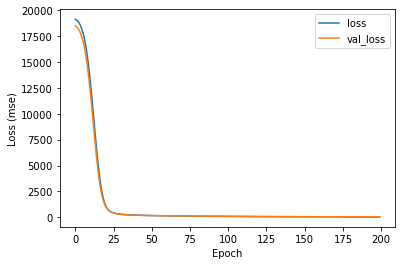

In [11]:
#Performa Pelatihan Model ANN
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
# plt.savefig("losses plot.png",dpi=500)

In [12]:
ypredtrain = model.predict(X_train)

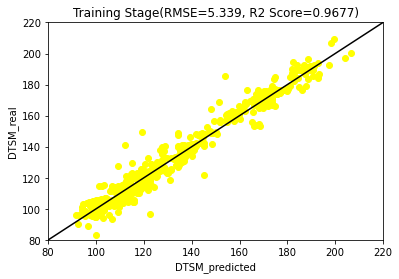

Mean Absolute Error: 3.9826318006036936
Mean Squared Error: 31.304607264356765
Root Mean Squared Error: 5.595052034106275
r2 Score :  0.9645646540651944


In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics

u = np.arange(80,220,0.01)
i = u
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtrain,y_train,color='yellow' )
plt.title("Training Stage(RMSE=5.339, R2 Score=0.9677)")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")
# plt.savefig("Train Stage ANN.png", dpi=500)
# files.download("Train Stage ANN.png")
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ypredtrain))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, ypredtrain))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ypredtrain)))
print('r2 Score : ',r2_score(y_train, ypredtrain, sample_weight=None, multioutput='uniform_average'))

In [14]:
ypredtest = model.predict(X_test)

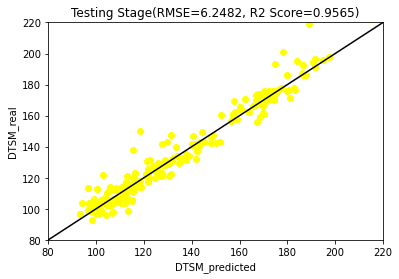

Mean Absolute Error: 4.269861867768886
Mean Squared Error: 39.65780045202938
Root Mean Squared Error: 6.297443961801437
r2 Score :  0.9559129440149464


In [15]:
# Crossplot test 
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtest,y_test, color='yellow')
plt.title("Testing Stage(RMSE=6.2482, R2 Score=0.9565)")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")
# plt.savefig("Test Stage ANN.png",dpi=500)
# files.download("Test Stage ANN.png")
plt.show()
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypredtest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypredtest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypredtest)))
print('r2 Score : ',r2_score(y_test, ypredtest, sample_weight=None, multioutput='uniform_average'))

In [16]:
#Test To all data sample
X_test = data[['DTCO','NPHI','DEPT','ECGR','ATRT']]
X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
data ['DTSM_PRED'] = predictions

In [17]:
data.to_csv("Hasil_ANN_AllData.csv",index=False)

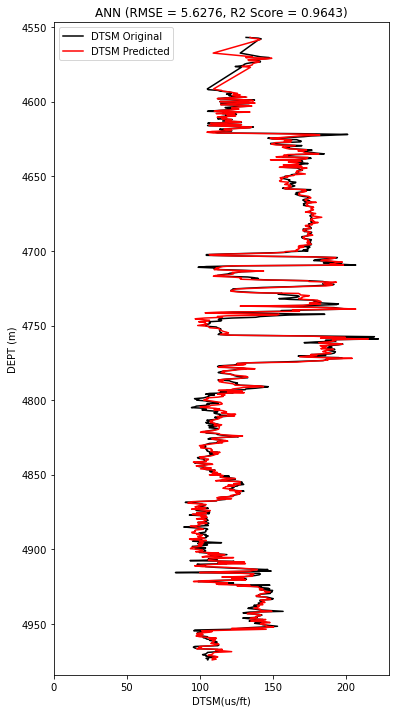

In [18]:
# Hasil Prediksi DTSM
plt.figure(figsize=(6,12))
plt.plot(data['DTSM'],data['DEPT'],label='DTSM Original',color="black")
plt.plot(data['DTSM_PRED'],data['DEPT'],label='DTSM Predicted', color='red')
plt.title("ANN (RMSE = 5.6276, R2 Score = 0.9643)")
plt.ylabel("DEPT (m)")
plt.xlabel("DTSM(us/ft)")
plt.xlim(0)
plt.ylim((np.min(data["DEPT"]))-10,(np.max(data["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
# plt.savefig("HasilANN_to_alldepth.png", dpi=500)
# files.download("HasilANN_to_alldepth.png")
plt.show()

In [19]:
print(data[['DTSM','DTSM_PRED']].shape)

(786, 2)


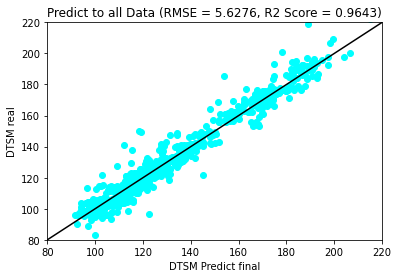

Mean Absolute Error: 4.068873800511639
Mean Squared Error: 33.81268953967354
Root Mean Squared Error: 5.814867972677758
r2 Score :  0.961979617791174
koefisien korelasi : 0.9808978690234639


In [20]:
plt.scatter (data['DTSM_PRED'],data['DTSM'], color='cyan')
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.xlabel("DTSM Predict final")
plt.ylabel("DTSM real")
plt.title('Predict to all Data (RMSE = 5.6276, R2 Score = 0.9643)')
# plt.savefig("Predict Final ANN.png",dpi=500)
# files.download("Predict Final ANN.png")
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(data['DTSM'], data['DTSM_PRED']))
print('Mean Squared Error:', metrics.mean_squared_error(data['DTSM'], data['DTSM_PRED']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data['DTSM'], data['DTSM_PRED'])))
print('r2 Score : ',r2_score(data['DTSM'], data['DTSM_PRED'], sample_weight=None, multioutput='uniform_average'))
Corr=np.corrcoef(data['DTSM'], data['DTSM_PRED'])
print('koefisien korelasi :', Corr[1,0])

In [21]:
# predicting on another well (Poseidon2)
filename2 = "E:\poseidon2.csv"
data2all = np.loadtxt(filename2, skiprows=1,delimiter=',')
mneumonics =  ['DEPT','ECGR','ATRT','DTCO','DTSM','RHOB','NPHI']
data2all = pd.DataFrame(data2all, columns=mneumonics)
# data2=data2all[['DEPT','GR','ATRT','DTCO','RHOB','NPHI']]
data2all[data2all==-999.2500]= np.nan
data2=data2all.dropna()
data2.head()

,DEPT,ECGR,ATRT,DTCO,DTSM,RHOB,NPHI
8432,4706.0,87.1060,5.2738,63.5098,125.8618,2.7045,18.5850
8433,4706.5,114.0807,14.5054,53.4385,94.4603,2.6881,19.8786
8434,4707.0,132.6039,42.6378,56.3126,104.6554,2.5873,9.4619
8435,4707.5,76.1229,27.6133,60.5667,112.1985,2.5631,7.1419
8436,4708.0,81.0515,9.4066,70.8030,120.3025,2.5848,17.3160


In [22]:
X2 = data2[['DTCO','NPHI','DEPT','ECGR','ATRT']].values
y2 = data2[['DTSM']].values
print(X2.shape)
print(y2.shape)

(1183, 5)
(1183, 1)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

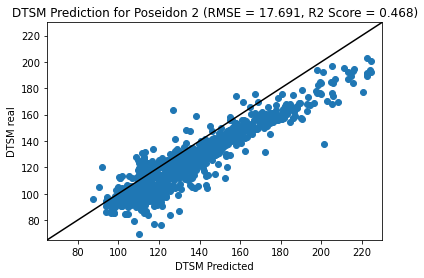

Mean Absolute Error: 12.907574116842442
Mean Squared Error: 294.5851160403139
Root Mean Squared Error: 17.163482048824296
r2 Score :  0.49957255960400915


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

ypredpos2 = model.predict(X2)
plt.scatter (ypredpos2,y2)
s = np.arange(65,230,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(65,230)
plt.ylim(65,230)
plt.xlabel("DTSM Predicted")
plt.ylabel("DTSM real")
plt.title('DTSM Prediction for Poseidon 2 (RMSE = 17.691, R2 Score = 0.468)')
# plt.savefig("Predict POS2 ANN.png", dpi=500)
# files.download("Predict POS2 ANN.png")
plt.show()
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, ypredpos2))
print('Mean Squared Error:', metrics.mean_squared_error(y2, ypredpos2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, ypredpos2)))
print('r2 Score : ',r2_score(y2, ypredpos2, sample_weight=None, multioutput='uniform_average'))

NameError: name 'files' is not defined

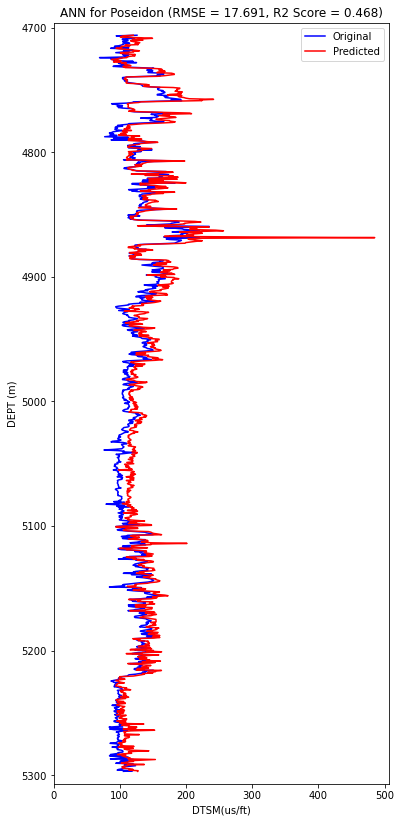

In [25]:
plt.figure(figsize=(6,14))
plt.plot(y2,data2['DEPT'],label='Original',color='blue')
plt.plot(ypredpos2,data2['DEPT'],label='Predicted',color='red')
plt.title("ANN for Poseidon (RMSE = 17.691, R2 Score = 0.468)")
plt.ylabel("DEPT (m)")
plt.xlabel("DTSM(us/ft)")
plt.xlim(0)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("HasilANN_to_poseidon2.png", dpi=500)
files.download("HasilANN_to_poseidon2.png")
plt.show()
print("DTSM_pred_max =",np.max(ypredpos2))
print("DTSM_pred_min =",np.min(ypredpos2))